# init
@author: Alexandre Pereira Santos <br>
alexandre.santos(at)lmu.de

## Tasks
- get OpenStreetMap data using the osmnx functionalities in the Overpass API
- get boundary='administrative' and admin_level=10
- clip it to an AOI

## Prerequisites
- have osmnx and geopandas installed
- have an AOI saved as a vector (shapefile or geopackage)

In [1]:
import osmnx as ox
import geopandas as gpd
from pathlib import Path

# imports

In [2]:
#import the AOI
AOI_path = Path('../data/processed/')
AOI_file = 'MUM_LIM_BoundingBox_AOI_A.shp'
AOI_gdf = gpd.read_file(AOI_path / AOI_file)

In [4]:
#bounds provides minx, miny, maxx, maxy
aoi_coords = AOI_gdf.to_crs(epsg='4326').envelope
bbox_df = gpd.GeoDataFrame(geometry=aoi_coords)
print('N',aoi_coords.bounds.values[0][3],'S',aoi_coords.bounds.values[0][1],'W',aoi_coords.bounds.values[0][0],'E',aoi_coords.bounds.values[0][2])

N 19.508803140392544 S 18.871126588495923 W 72.72380305888201 E 73.2026051451145


<Axes: >

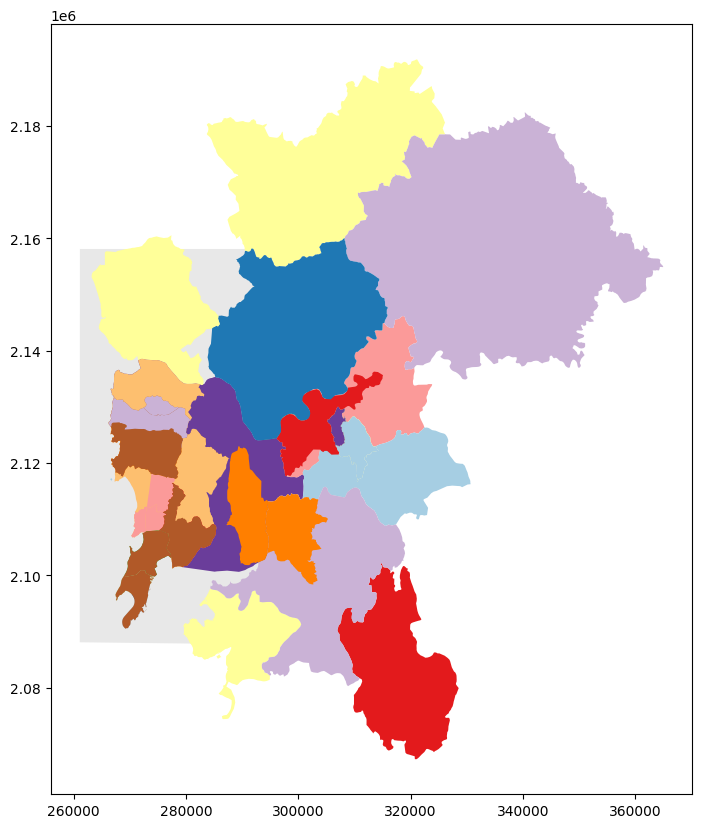

In [23]:
# get admin polygons for neighbourhoods in the AOI
# List key-value pairs for tags
# - get boundary='administrative' and admin_level=10
tags = {'boundary': ['administrative']} # see https://wiki.openstreetmap.org/wiki/Key:place for more info
col_list = ['osmid','name','geometry', 'admin_level','place'] #OSM has hundreds of cols, we just want a few. For info, check roads.columns'source',,'surface'

places = ox.features_from_bbox(north=aoi_coords.bounds.values[0][3],
                              south=aoi_coords.bounds.values[0][1],
                              west=aoi_coords.bounds.values[0][0],
                              east=aoi_coords.bounds.values[0][2],
                              tags=tags)
places.reset_index(inplace=True)

#filtering out the wrong geometries (POLYGON or POINT) and element types (NODE)
places = places.loc[(places.geometry.type=='Polygon')&(places.admin_level.notna()), col_list] #&(places.element_type == 'way') 
#convert the CRS of roads to the same as AOI
places.to_crs(AOI_gdf.crs,inplace=True)

#plot them
places.plot('name',ax=AOI_gdf.plot(figsize=(10, 10),  alpha=0.5, color='lightgray'),cmap='Paired', zorder=2) #linewidth=1,

In [24]:
places['admin_level'].sort_values().unique()

array(['10', '5', '6', '8', '9'], dtype=object)

In [25]:
places

,osmid,name,geometry,admin_level,place
0,481573184,Dombivali,"POLYGON ((302556.396 2124246.528, 302350.993 2...",8,NaN
40,932438978,Ambu Island,"POLYGON ((266825.542 2117226.147, 266810.014 2...",10,islet
44,7117887,Dombivali,"POLYGON ((302556.396 2124246.528, 302350.993 2...",8,NaN
45,7120000,Thane,"POLYGON ((280351.875 2129141.890, 280440.011 2...",8,NaN
46,7885386,T Ward,"POLYGON ((278347.925 2120299.505, 278345.655 2...",10,NaN
47,7888964,Zone 6,"POLYGON ((277517.051 2116411.828, 277522.618 2...",9,NaN
49,7964375,Mumbai Suburban District,"POLYGON ((266635.733 2126429.461, 266603.096 2...",5,NaN
52,10351344,Thane Taluka,"POLYGON ((267062.039 2131620.383, 267079.736 2...",6,NaN
53,10351345,Kalyan Taluka,"POLYGON ((296162.621 2124438.548, 296336.925 2...",6,NaN
54,10351346,Ulhasnagar Taluka,"POLYGON ((305870.970 2126197.154, 305839.303 2...",6,NaN


In [22]:
places.columns
#.to_file('../data/processed/LIM_rs_floods_2024_guaiba_neighbourhoods_A.shp')

Index(['osmid', 'name', 'geometry', 'admin_level', 'place', 'surface'], dtype='object')

In [20]:
places.type.unique()

array(['Polygon'], dtype=object)

# export

In [27]:
#export places to a shapefile
export_path = Path('D:/Dropbox/x/PostDoc/23 10 LMU/13 exp_cases/24 01 Urban SSP MAN MUM JAK/GIS_temp/')
places.to_file(AOI_path / 'MUM_LIM_MMR_municipalities_A.shp')

C:\Users\ra42zek\AppData\Local\Temp\ipykernel_66748\4228222734.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  places.to_file(AOI_path / 'MUM_LIM_MMR_municipalities_A.shp')
